In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



In [38]:
# 원본 데이터 살펴보기
data = datasets.load_breast_cancer()
data.feature_names # 데이터의 속성 종류들을 확인 (30개의 속성. 즉, 30차원의 데이터 셋)

x = data.data[:, :2] # 데이터의 속성 중 첫 번째, 두 번째 속성 두 가지만 선택해서 변수 x에 저장 (mean radius, mean texture)
y = data.target
target_names = data.target_names # 악성(maliganant)과 양성을 저장.

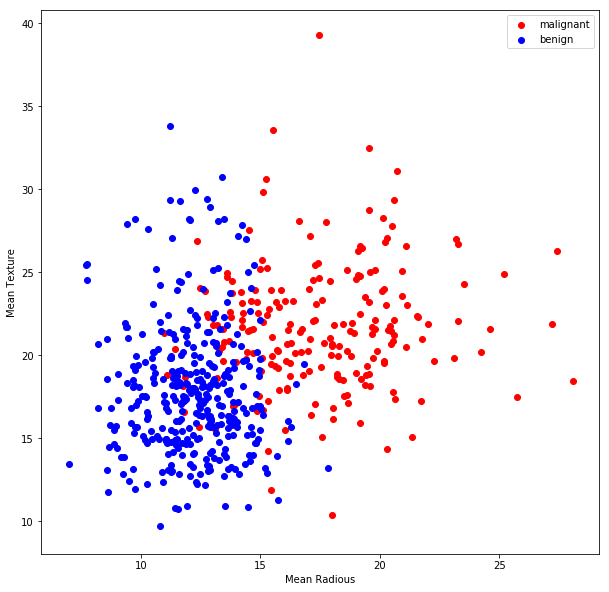

In [39]:
# 산포도 그리기
plt.figure(figsize=(10, 10))
colors = ['red', 'blue']

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(x[y == i, 0], x[y == i, 1], color=color, label=target_name) 
    # 속성 x의 클래스 y가 i즉, 0 또는 1인지 확인 후, x의 0번 속성을 x축값, 1번 속성을 y축 값으로 지정한다.
    # 해당 클래스 인덱스에 해당하는 색상으로 표시하고 라벨을 클래스 이름으로 설정함.
    
plt.legend()
plt.xlabel('Mean Radious')
plt.ylabel('Mean Texture')
plt.show()

# PCA 적용하기
위 데이터는 분리하기 어려운 데이터 셋임.

In [40]:
x = data.data # 30개의 속성 모두를 변수 x에 저장한다
y = data.data
target_names = data.target_names # 악성과 양성

In [41]:
pca = PCA(n_components=2) # 주성분 분석을 위한 모듈 pca를 생성. 주성분 두 개 추출하기 위해서 n_component=2로 설정. 
                                           # 2차원 공간에 산포도를 그리고 비교하기 위함이다.
x_p = pca.fit(x).transform(x) 
    # fit : 속성 데이터 x에 대해 훈련
    # transform : 차원 축소를 진행. 차원 축소 결과를 변수 x_p에 저장
    
print("가장 큰 주성분 두 개에 대한 분산 : %s" %str(pca.explained_variance_ratio_))
    # 첫 번째 주성분의 분산 0.98, 두 번쨰 주성분의 분산 0.01

가장 큰 주성분 두 개에 대한 분산 : [ 0.98204467  0.01617649]


In [42]:
# 2. 산포도 그리기
plt.figure(figsize=(10, 10))
colors = ['red', 'blue']

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(x_p[y == i, 0], x_p[y == i, 1], color=color, label=target_name) 
    # 데이터 셋이 x가 아닌 PCA 결과로 수집한 주성분 두 개의 x_p라는 것에 주의
    
plt.legend()
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

IndexError: too many indices for array

# LDA 적용하기

LDA : 데이터를 클래스 별로 잘 분리할 수 있는 벡터를 찾는 방법
cf) PCA(Principal Component Analysis) : 고차원의 데이터를 저차원의 데이터로 변환하는 차원축소 방법


In [ ]:
x = data.data
y = data.target
target_names = data.target_names

lda = LinearDiscriminantAnalysis(solver='eigen', n_components=2) 
x_l = lda.fit(x, y).transform(x) # PCA와 다르게, LDA는 클래스 정보를 가지고 진행하기 떄문에 fit함수에 클래스 데이터 y를 함께 적용한다.
    # transform : 차원축소를 진행

In [ ]:
# 2. 산포도 그리기
plt.figure(figsize=(10, 10))
colors = ['red', 'blue']

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(x_l[y == i, 0], x_l[y == i, 1], color=color, label=target_name) 
    # 데이터 셋이 x가 아닌 PCA 결과로 수집한 주성분 두 개의 x_p라는 것에 주의
    
plt.legend()
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.show()

In [ ]:
# 미세먼지 분석하기

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
data = pd.read_csv('2015_data.csv', encoding='cp949')
data.tail()

FileNotFoundError: File b'2015_data.csv' does not exist

In [ ]:
# 서울지역만 데이터 추출하기
data_seoul = data[data.Location.isin(['서울'])]
data_seoul.tail()

In [ ]:
# 지역별 상관관계 분석
data_seoul.corr() # 데이터르에미에서 상관관계를 출력

NameError: name 'sns_heatmap' is not defined

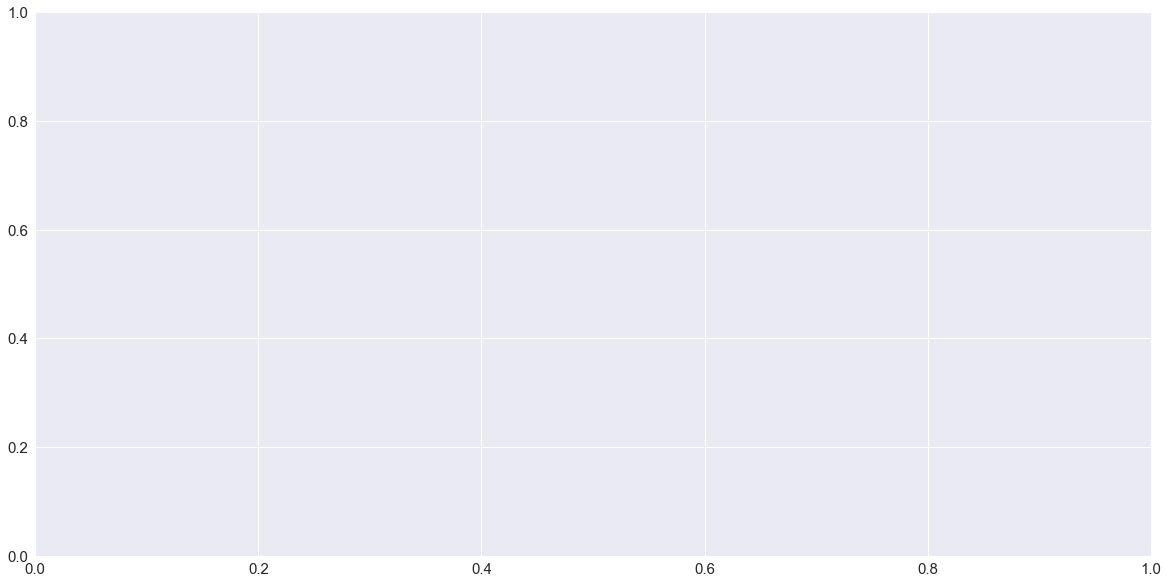

In [46]:
# 히트맵으로 상관관계 그리기
import seaborn as sns
%matplotlib inline

sns.set(font_scale=1.5) # 글씨 크기 설정
f, ax = plt.subplots(figsize=(20, 10)) # 인치 단위

# esanborn라이브러리를 이용해 히트맵 표현
sns_heatmap = sns_heatmap(data_seoul.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='RdBu_r')
        # annot=True : 상관관계를 시각화할 때 각 변수를 표현하는 부분
        # fmt='.2f' : 소수점 2번째 자리까지 표현
        # linewidths =.5 : 시각화시 칸과 칸 사이 간격을 0.5로 나타냄
        # cmap='RdBu_r' : 양의 상관관계일 때 붉은색, 음의 상관관계일 때 푸른색

미세먼지가 증가할 때 미세먼지 요인들이 같이 증가 또는 감소함을 알 수 있따.

관련 요인으로는 NO2와 SO2, CO 등이 미세먼지가 증가할 때 같이 증가하는 양의 상관관계를 나타낸다.
Heatmap 분석 시 붉은색 또는 푸른색이 짙을수록 각각 양, 음의 상관관계가 높은 것을 알 수 있다.

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data=pd.read_csv('total_weather.csv', encoding='cp949')
print("데이터의 총 수 ", len(data))
data.tail()

In [49]:
# 월별 데이터를 계절 형태로 바꾸기
data_seoul = data[data.Location.isin(['서울'])]

data_dict = {"01": "겨울", "02":"겨울", "03" : "봄", "04" : "봄", "05" : "봄", "06" : "여름", "07" : "여름", "08" : "여름", "09" : "여름", "10" : "가을",  "11" : "가을", , "12":"겨울"}
data_seoul['Season']=data_seoul.Data.str[5:7].map(date_dict)

SyntaxError: invalid syntax (<ipython-input-49-0e86b98a5a24>, line 4)

In [50]:
# 겨울에 해당하는 데이터 추출하기
data_seoul = data_seoul[data_seoul.Season.isin(['겨울'])]
data_seoul.tail()

NameError: name 'data_seoul' is not defined

AttributeError: seoul

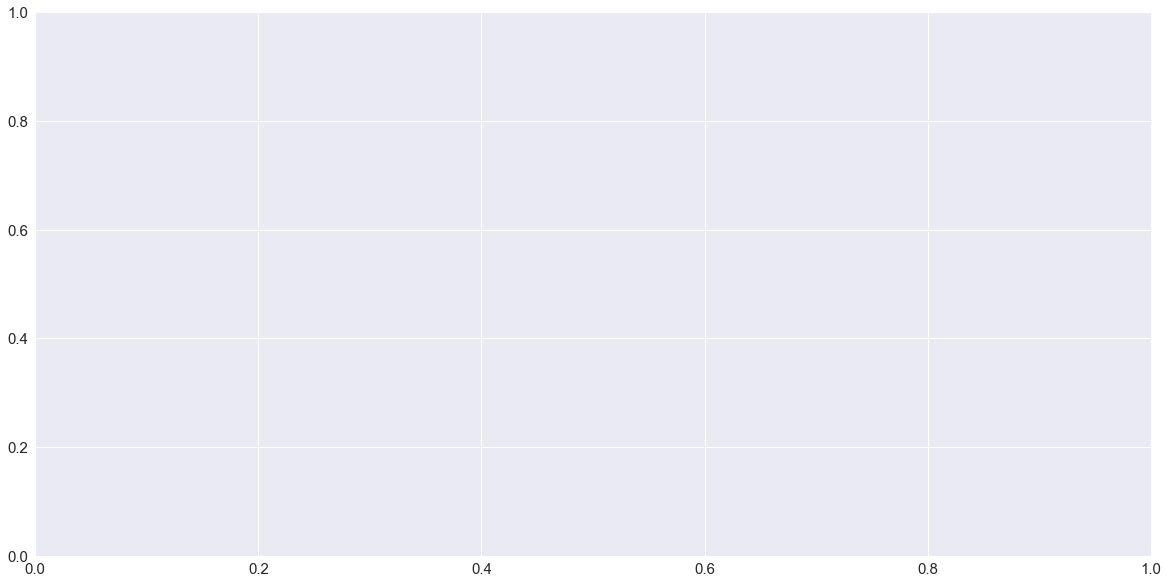

In [51]:
# 상관관계 분석해서 시각화
sns.set(font_scale=1.5) # 시각화할 때 환경설정을 하는 함수
f, ax = plt.subplots(figsize=(20,10))
sns_heatmap = sns.heatmap(data.seoul.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='RdBu_r')